In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

## Problem 1: 

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

## 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

4

## Data description

In [797]:
df_election = pd.read_excel('Election_Data.xlsx', sheet_name= 'Election_Dataset_Two Classes')
df_election.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [798]:
df = df_election.drop('Unnamed: 0', axis=1)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [799]:
df.shape

(1525, 9)

In [800]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

##### Data dictionary

1. vote: Party choice: Conservative or Labour
2. age: in years
3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.
4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.
5. Blair: Assessment of the Labour leader, 1 to 5.
6. Hague: Assessment of the Conservative leader, 1 to 5.
7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.
8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
9. gender: female or male.


In [801]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [802]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


No null values

2 object and remaining are numeric

In [803]:
df.duplicated().sum()

8

In [804]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.18,15.71,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.25,0.88,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.14,0.93,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.33,1.17,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.75,1.23,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.73,3.30,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.54,1.08,0.0,0.0,2.0,2.0,3.0


1) Age (years):

No variation in this features. \
Minimum voting age is 24 and maximum is 93. \
Average age is ~54.


2) economic.cond.national:
    
Currrent national economic condition is rated from 1 to 5.  \
Average rating is 3.25 which shows national economic condition is good.

3) economic.cond.household:

Current household economic condition also rated on scale of 1 to 5.\
Average rating is 3.14 which shows household economic condition is also good.

On comparing both national and household, national economic condition is slightly better than household. 

4) Blair: 

Assessment of 'Labour' party leaders is rated from 1 to 5.
Average rating is 3.33 which is good. 



5) Hague: 

Assessment of 'Conservative' party leaders is rated from 1 to 5.
Average rating is 2.73 which is not good. 

On comparing both Labour and Conservative parties, Labour party is having better rating than Conservative in this particular survey. 



6) Europe: 

An 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment. 

Average is 6.73 which indicates respondents' attitudes towards European integration is neutral. 



7) political.knowledge: 

This feature is regarding knowledge of parties' positions on European integration, on scale of 0 to 3. Majority of the voters are aware of parties stand on European integration. 





In [805]:
df.gender.value_counts(normalize=True)

female    0.532459
male      0.467541
Name: gender, dtype: float64

Survey was involved more of females.

In [806]:
df.vote.value_counts(normalize=True)

Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64

~70% of the voters have chosen Labour party over Conservative party. CNBE survey showing Labour party as the winner. 

In [12]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

## Data pre-processing

## Duplicate records:

In [13]:
df.duplicated().sum()

8

In [14]:
df[df.duplicated()]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


It can be inferred that duplicated records are significant to keep for analysis.

No anamolies observed

## 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

7

## Data visualization

## Univariate analysis

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'economic.cond.national'}>,
        <AxesSubplot:title={'center':'economic.cond.household'}>],
       [<AxesSubplot:title={'center':'Blair'}>,
        <AxesSubplot:title={'center':'Hague'}>,
        <AxesSubplot:title={'center':'Europe'}>],
       [<AxesSubplot:title={'center':'political.knowledge'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

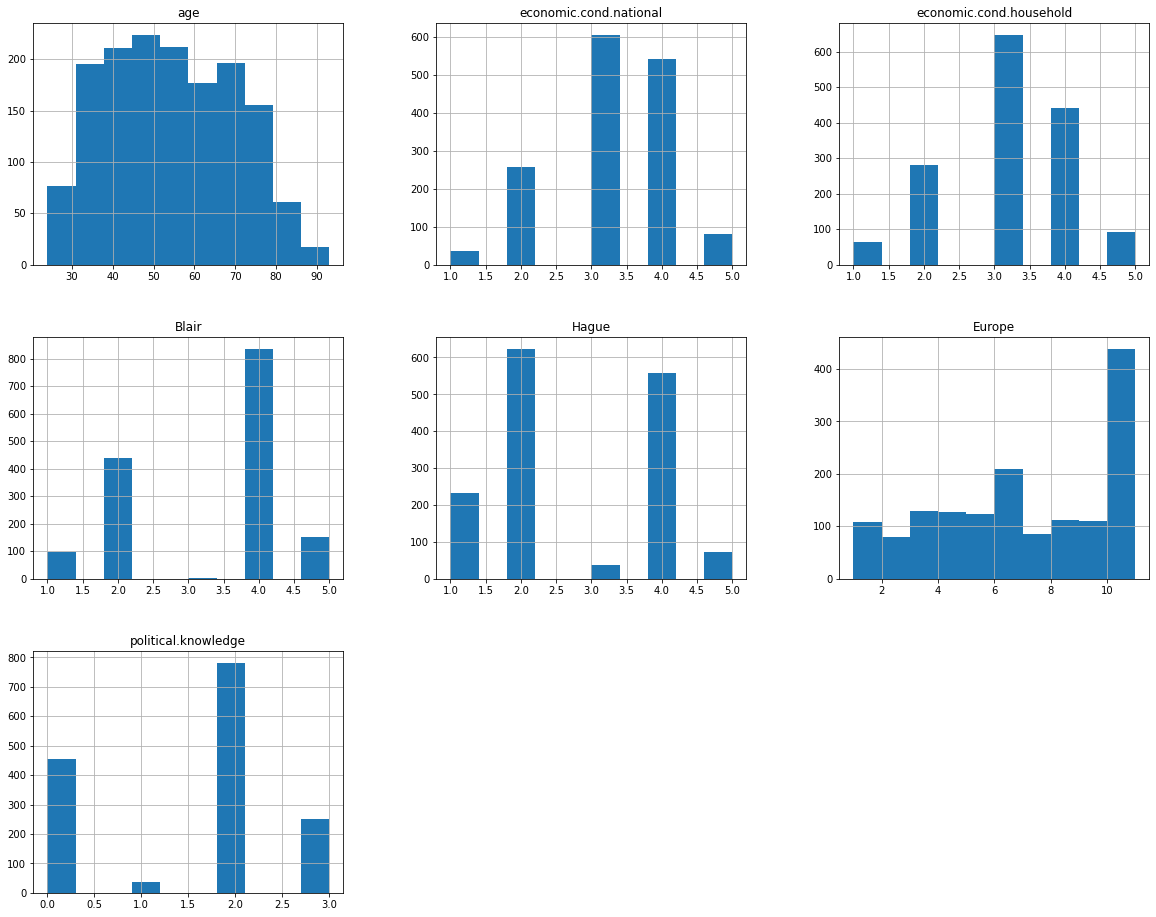

In [15]:
df.hist(figsize=(20,16))

In [16]:
round(df.skew(),2)

C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_13060\1092346110.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  round(df.skew(),2)


age                        0.14
economic.cond.national    -0.24
economic.cond.household   -0.15
Blair                     -0.54
Hague                      0.15
Europe                    -0.14
political.knowledge       -0.43
dtype: float64

All the features are normally distributed.

In [17]:
df.select_dtypes(include=['float64','int64']).columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge'],
      dtype='object')

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

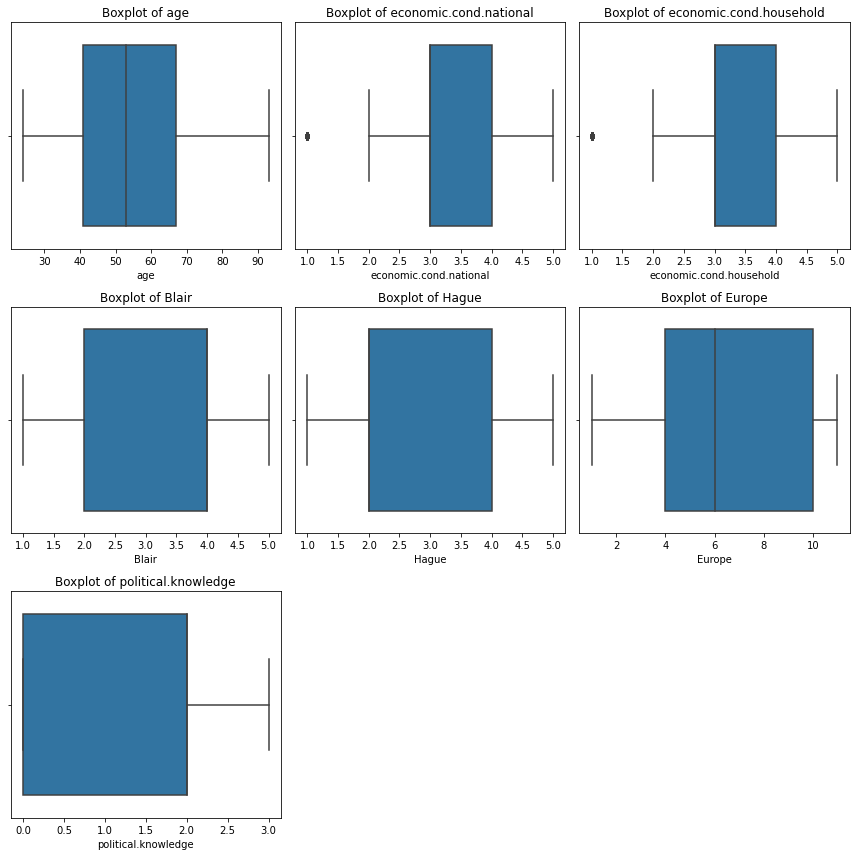

In [18]:
plt.figure(figsize = (12,12))
feature_list = df.select_dtypes(include=['float64','int64']).columns
for i in range(len(feature_list)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(df[feature_list[i]], data = df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Outliers are present only in two features i.e., economic.cond.national, economic.cond.household. But these are discrete numeric features having significant in keeping every value. So outlier treatment is not required for this dataset and outlier proportion also cannot be discussed for this dataset.

In [19]:
object = df.select_dtypes(include=['object']).columns
range(len(object))

range(0, 2)

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


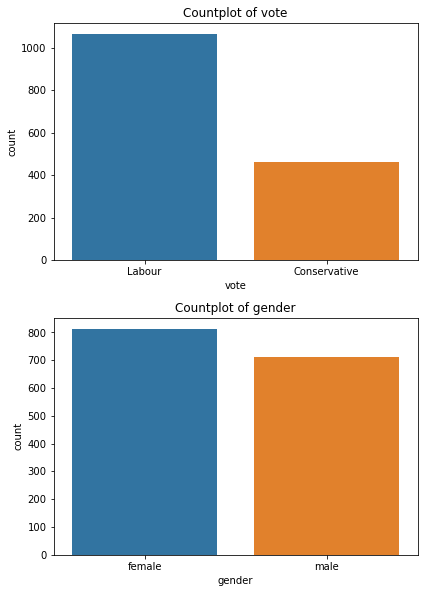

In [20]:
plt.figure(figsize=(6,12))
for i in range(len(object)):
    plt.subplot(3, 1, i + 1)
    sns.countplot(df[object[i]], data = df)
    plt.title('Countplot of {}'.format(object[i]))
    plt.tight_layout()

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Countplot of Blair')

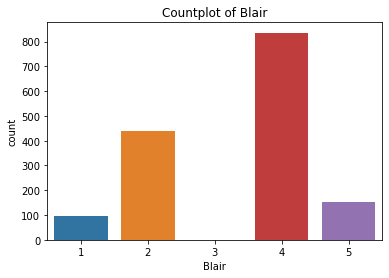

In [809]:
sns.countplot(df['Blair'])
plt.title('Countplot of Blair')

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Countplot of Hague')

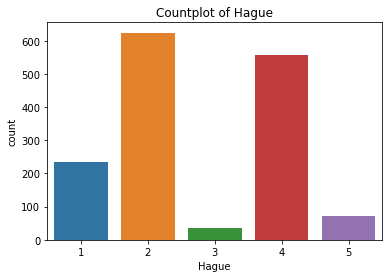

In [810]:
sns.countplot(df['Hague'])
plt.title('Countplot of Hague')

## Bivariate analysis:

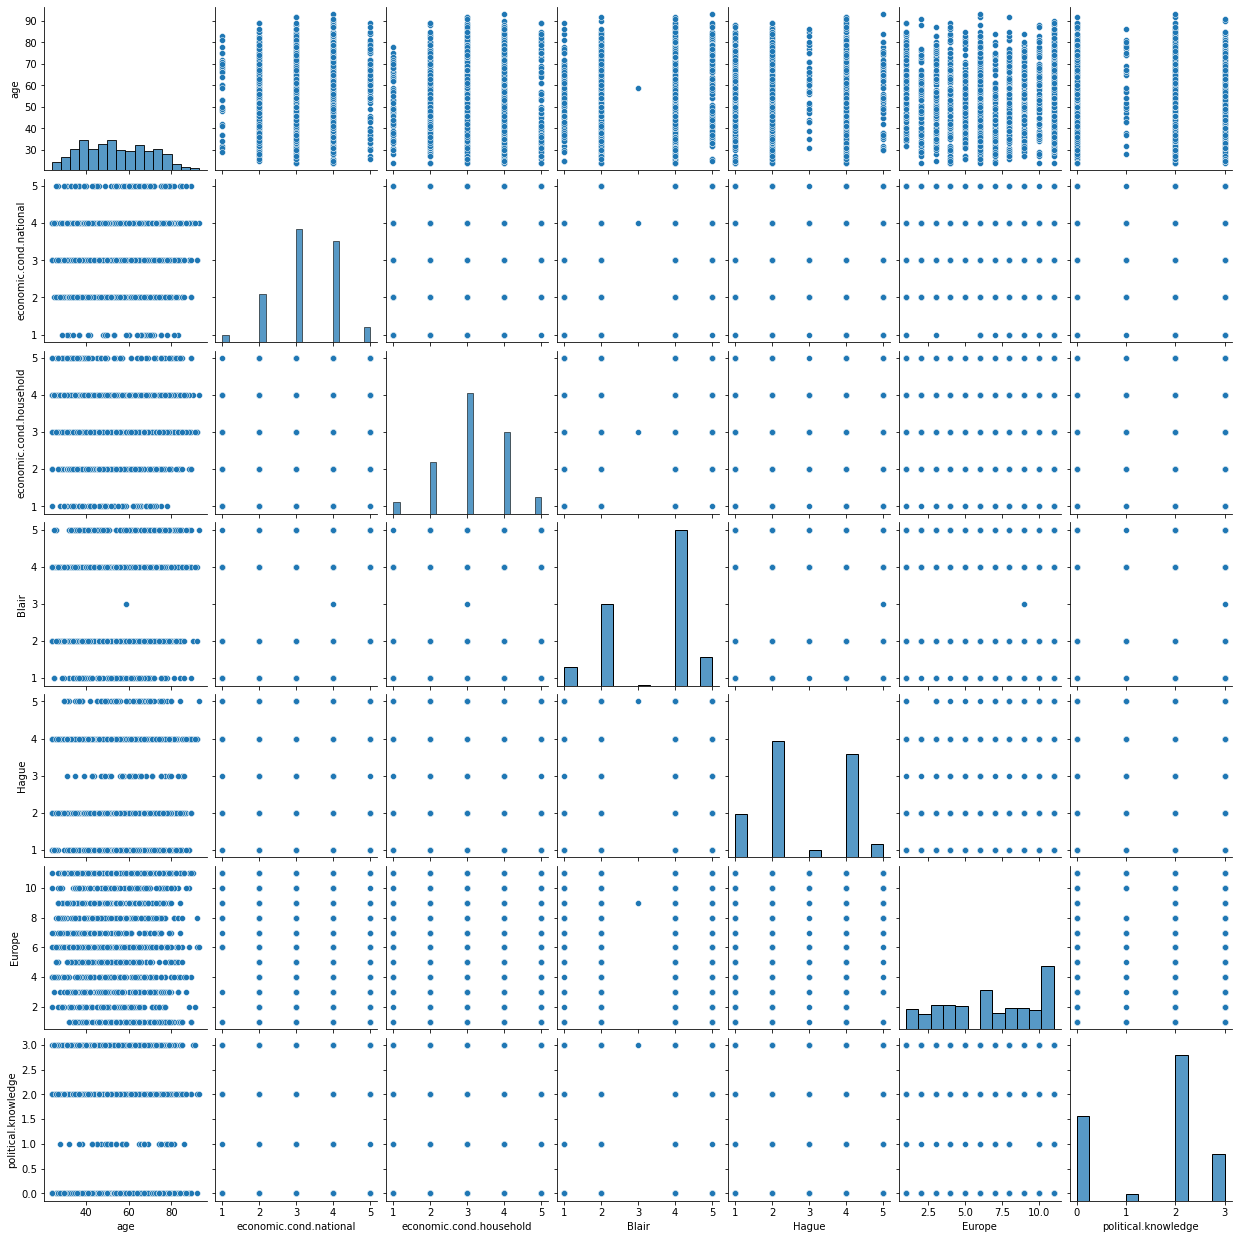

In [21]:
sns.pairplot(df);

<AxesSubplot:>

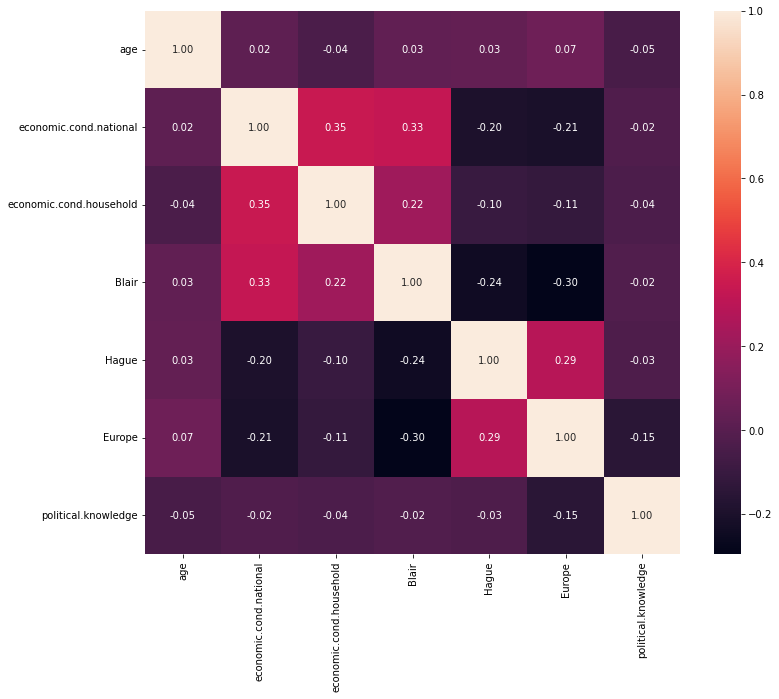

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Except age feature, all the numeric features are discrete. That is why we are not observing any correlation among the numeric features available.

Text(0.5, 1.0, 'Count plot of vote for gender')

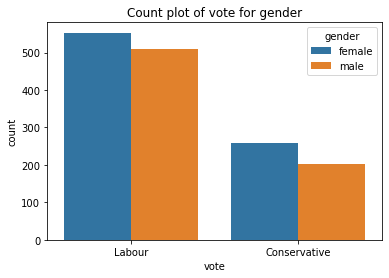

In [23]:
sns.countplot(x=df['vote'], hue= df['gender'])
plt.title('Count plot of vote for gender')

Text(0.5, 1.0, 'Count plot of vote for economic.cond.national')

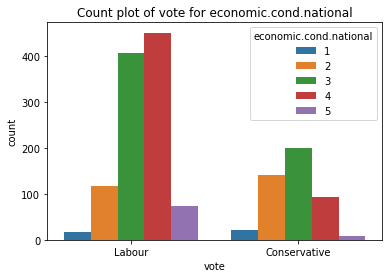

In [24]:
sns.countplot(x=df['vote'], hue= df['economic.cond.national'])
plt.title('Count plot of vote for economic.cond.national')

Text(0.5, 1.0, 'Count plot of vote for economic.cond.household')

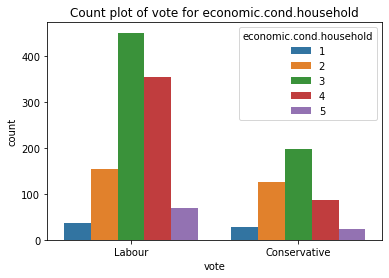

In [25]:
sns.countplot(x=df['vote'], hue= df['economic.cond.household'])
plt.title('Count plot of vote for economic.cond.household')

Text(0.5, 1.0, 'Count plot of vote for Europe')

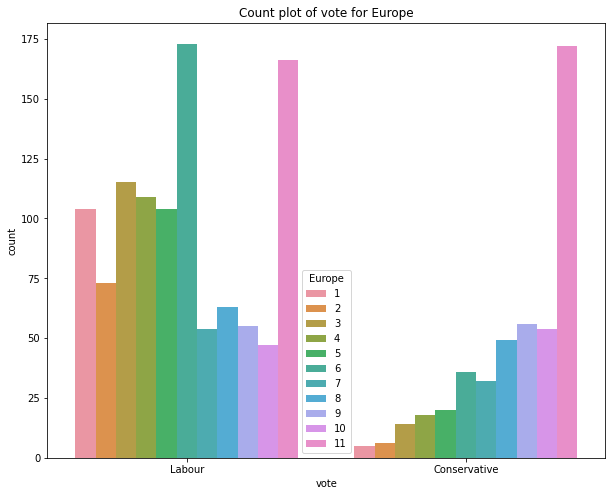

In [28]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['vote'], hue= df['Europe'])
plt.title('Count plot of vote for Europe')

Text(0.5, 1.0, 'Count plot of vote for political.knowledge')

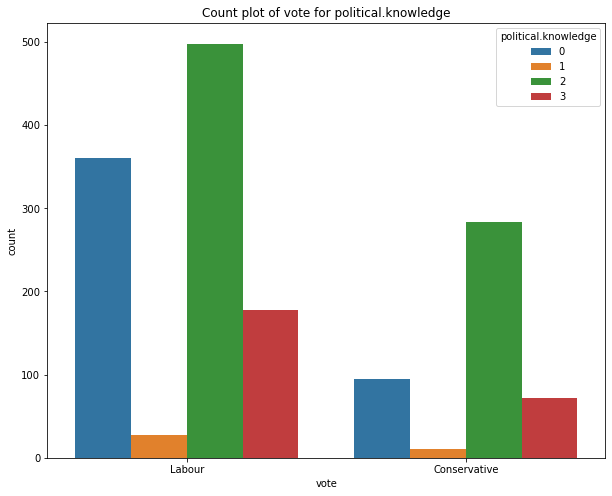

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['vote'], hue= df['political.knowledge'])
plt.title('Count plot of vote for political.knowledge')

## 1.3) Encode the data (having string values) for Modelling. 
## Is Scaling necessary here or not?( 2 pts), 
## Data Split: Split the data into train and test (70:30) (2 pts). 
## The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

4

### Data encoding:

In [30]:
## Converting the 'voter' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [31]:
df['vote'] = LE.fit_transform(df['vote'])
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,female
1,1,36,4,4,4,4,5,2,male
2,1,35,4,4,5,2,3,2,male
3,1,24,4,2,2,1,4,0,female
4,1,41,2,2,1,1,6,2,male


1- Labour\
0- conservative

In [32]:
df_encoded = pd.get_dummies(df,drop_first=True)
df_encoded.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


0- female\
1- male

In [811]:
df_encoded.shape

(1525, 9)

Data encoding done.

### Data splitting:

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df_encoded.drop('vote', axis=1)
y= df_encoded[['vote']]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify= df_encoded['vote'])

In [36]:
print('Shape of X_train is', X_train.shape)
print('Shape of y_train is', y_train.shape)
print('Shape of X_test is', X_test.shape)
print('Shape of y_test is', y_test.shape)

Shape of X_train is (1067, 8)
Shape of y_train is (1067, 1)
Shape of X_test is (458, 8)
Shape of y_test is (458, 1)


In [37]:
print('Split percent of X_train is', round(X_train.shape[0]*100/1525,2))
print('Split percent of y_train is', round(y_train.shape[0]*100/1525,2))
print('Split percent of X_test is', round(X_test.shape[0]*100/1525,2))
print('Split percent of y_test is', round(y_test.shape[0]*100/1525,2))

Split percent of X_train is 69.97
Split percent of y_train is 69.97
Split percent of X_test is 30.03
Split percent of y_test is 30.03


It can be seen that data successfully splitted into train/test 70:30 ratio

### Data scaling:

Data scaling is not required for this dataset.\
Reason: The machine learning algorithms require the scaling if the values of the features are not closer to each other. If the values are close, there are chances for the algorithm to get trained well and faster instead of the data set where the data points or features values have high differences with each other will take more time to understand the data and the accuracy will be lower. 

So if the data in any conditions has data points far from each other, scaling is a technique to make them closer to each other or in simpler words, we can say that the scaling is used for making data points generalized so that the distance between them will be lower. 

For the given dataset, values are closer to each other, there are no significant outliers. So, scaling is not required for this dataset.

#### Scaling

In [57]:
from scipy.stats import zscore


In [72]:
X_train_s = X_train.copy()
X_train_s[['age']] = X_train_s[['age']].apply(zscore)
X_train_s.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
1493,-1.266219,3,1,4,2,6,2,0
1431,-0.757323,3,4,4,4,3,2,0
235,-1.138995,4,4,4,2,7,2,0
1078,0.642142,4,3,2,1,4,2,1
735,-1.075383,4,4,4,2,2,3,1


In [75]:
X_test_s = X_test.copy()
X_test_s[['age']] = X_test_s[['age']].apply(zscore)
X_test_s.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
1317,-1.458270,3,4,4,4,9,0,1
229,0.841487,2,3,5,2,8,0,0
609,1.863601,4,2,4,1,4,3,0
24,0.330430,3,2,4,4,2,2,0
1479,1.544190,4,4,5,1,3,3,1


## 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). 
## Interpret the inferences of both models (2 pts). 
## Successful implementation of each model. 
## Logical reason behind the selection of different values for the parameters involved in each model. 
## Calculate Train and Test Accuracies for each model. 
## Comment on the validness of models (over fitting or under fitting)

4

### Logistic regression

In [846]:
from sklearn.linear_model import LogisticRegression

In [849]:
lor_model = LogisticRegression(max_iter=10000, solver='sag', class_weight='balanced')

In [850]:
lor_model.fit(X_train, y_train)

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=10000, solver='sag')

Solver: 

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes.

As we have two classes in the target variable and also have enough rows in the dataset, we can use 'sag' or 'saga' solvers. Let us choose 'sag' solver for our model.

max_iter:

Optimal number of iterations would be 10000 for our dataset to avoid overfitting of the model.

tolerance: 
    
0.0001 can be selected as optimum value to avoid overfitting as our dataset is not complex and not a big data.

In [851]:
LOR_train_score= lor_model.score(X_train, y_train)
LOR_train_score

0.8125585754451734

In [852]:
LOR_test_score=  lor_model.score(X_test, y_test)
LOR_test_score

0.8253275109170306

Model is valid

### LDA

In [853]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [1008]:
lda_model = LinearDiscriminantAnalysis()

In [1009]:
lda_model.fit(X_train,y_train)

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [1010]:
LDA_train_score=lda_model.score(X_train, y_train)
LDA_train_score

0.8256794751640113

In [1011]:
LDA_test_score=lda_model.score(X_test, y_test)
LDA_test_score

0.8449781659388647

## 1.5) Apply KNN Model and Naïve Bayes Model (2pts). 
## Interpret the inferences of each model (2 pts). 
## Successful implementation of each model. 
## Logical reason behind the selection of different values for the parameters involved in each model. 
## Calculate Train and Test Accuracies for each model. 
## Comment on the validness of models (over fitting or under fitting)

4

### Naive bayes

In [894]:
from sklearn.naive_bayes import GaussianNB

In [1040]:
nb_model = GaussianNB(var_smoothing= 0.000000001)

In [1041]:
nb_model.fit(X_train, y_train)  

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [1042]:
NB_train_score=nb_model.score(X_train, y_train)
NB_train_score

0.8219306466729147

In [1043]:
NB_test_score=nb_model.score(X_test, y_test)
NB_test_score

0.8471615720524017

### KNN model

In [1070]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean', leaf_size=30)
knn_model.fit(X_train_s,y_train)

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [1071]:
KNN_train_score=knn_model.score(X_train_s, y_train)
KNN_train_score

0.85941893158388

In [1072]:
KNN_test_score= knn_model.score(X_test_s, y_test)
KNN_test_score

0.8318777292576419

## 1.6) Model Tuning (4 pts) , 
## Bagging ( 1.5 pts) and Boosting (1.5 pts). 
## Apply grid search on each model (include all models) and make models on best_params.
## Define a logic behind choosing particular values for different hyper-parameters for grid search. 
## Compare and comment on performances of all. 
## Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

7

### Bagging

In [917]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(X_train, y_train)

C:\Users\Nandha Keshore\AppData\Local\Temp\ipykernel_13060\1419357735.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf_model.fit(X_train, y_train)


In [952]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(base_estimator=rf_model, n_estimators= 100, bootstrap=True, max_features=8, random_state=1)

In [953]:
bag_model = bag_model.fit(X_train, y_train)
bag_model

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=RandomForestClassifier(), max_features=8,
                  n_estimators=100, random_state=1)

In [954]:
Bag_train_score=  bag_model.score(X_train, y_train)
Bag_train_score

0.971883786316776

In [955]:
Bag_test_score=bag_model.score(X_test, y_test)
Bag_test_score

0.8427947598253275

Model is overfit, need to tuned

### Boosting

In [964]:
from sklearn.ensemble import GradientBoostingClassifier
boost_model = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100, max_features=8, random_state=1)

In [965]:
boost_model = boost_model.fit(X_train, y_train)
boost_model

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_features=8, random_state=1)

In [966]:
Boost_train_score= boost_model.score(X_train, y_train)
Boost_train_score

0.887535145267104

In [967]:
Boost_test_score = boost_model.score(X_test, y_test)
Boost_test_score

0.8384279475982532

Valid model

### Model tuning by using GridSearchCV

In [968]:
from sklearn.model_selection import GridSearchCV

#### Logistic regression

In [976]:
grid_lor = {'solver':['sag','lbfgs', 'saga', 'newton-cg'],
'tol':[0.0001, 0.00001],
'max_iter': [100,1000,10000], 'class_weight': ['balanced', 'dict']}

In [977]:
modellor = LogisticRegression()

In [978]:
grid_search_lor = GridSearchCV(estimator = modellor, param_grid = grid_lor, cv = 5, n_jobs=-1, scoring='f1')

In [979]:
grid_search_lor.fit(X_train, y_train)

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'dict'],
                         'max_iter': [100, 1000, 10000],
                         'solver': ['sag', 'lbfgs', 'saga', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [1096]:
print(grid_search_lor.best_params_)
print(grid_search_lor.best_estimator_)

{'class_weight': 'dict', 'max_iter': 10000, 'solver': 'sag', 'tol': 1e-05}
LogisticRegression(class_weight='dict', max_iter=10000, solver='sag', tol=1e-05)


In [981]:
best_model_lor = grid_search_lor.best_estimator_

In [982]:
LOR_g_train_score = best_model_lor.score(X_train, y_train)
LOR_g_train_score

0.8303655107778819

In [983]:
LOR_g_test_score = best_model_lor.score(X_test, y_test)
LOR_g_test_score

0.8493449781659389

#### LDA

In [1030]:
grid_lda ={'solver':['svd','lsqr', 'eigen'],
          'shrinkage': ['auto', 'float'],
          'tol':[0.0001, 0.00001],
          }

In [1031]:
modellda = LinearDiscriminantAnalysis()
grid_search_lda = GridSearchCV(estimator = modellda, param_grid = grid_lda, cv = 10, n_jobs=-1, scoring='accuracy')

In [1032]:
grid_search_lda.fit(X_train, y_train)

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 589, in fit
    raise NotImplementedError("shrinkage not supported")
NotImplementedError: shrinkage not supported

----------------------------------------------------------------------------

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'float'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05]},
             scoring='accuracy')

In [1095]:
print(grid_search_lda.best_params_)
print(grid_search_lda.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001}
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')


In [1026]:
best_model_lda = grid_search_lda.best_estimator_

In [1036]:
LDA_g_train_score = best_model_lda.score(X_train, y_train)
LDA_g_train_score

0.8284910965323337

In [1037]:
LDA_g_test_score = best_model_lda.score(X_test, y_test)
LDA_g_test_score

0.851528384279476

#### Naive bayes

In [184]:
np.logspace(0,-9, num=100)

array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.87381742e-05, 1.51991108e-05, 1.23284674e-05, 1.00000000e-05,
      

In [1038]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=1)

In [185]:
from sklearn.preprocessing import PowerTransformer
grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_search_nb = GridSearchCV(estimator=nb_model, 
                     param_grid=grid_nb, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')


In [186]:
grid_search_nb.fit(X_train, y_train)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [1044]:
print(grid_search_nb.best_params_)
print(grid_search_nb.best_estimator_)

{'var_smoothing': 0.0008111308307896872}
GaussianNB(var_smoothing=0.0008111308307896872)


In [1045]:
best_model_nb = grid_search_nb.best_estimator_

In [1046]:
NB_g_train_score = best_model_nb.score(X_train, y_train)
NB_g_train_score

0.8209934395501406

In [1047]:
NB_g_test_score= best_model_nb.score(X_test, y_test)
NB_g_test_score

0.851528384279476

#### KNN

In [1086]:
grid_knn = {'n_neighbors':[10,12,14,16,18,20,22,24,26],
         'leaf_size':list(range(2,50,5)),
           'weights': ['uniform','distance'],
           'metric': ['euclidean', 'manhattan', 'minkowski']}

In [1100]:
grid_search_knn = GridSearchCV(knn_model, param_grid= grid_knn, cv = 5,scoring = "recall",verbose=1)

In [1101]:
grid_search_knn.fit(X_train_s, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'leaf_size': [2, 7, 12, 17, 22, 27, 32, 37, 42, 47],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [10, 12, 14, 16, 18, 20, 22, 24, 26],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [1102]:
print(grid_search_knn.best_params_)
print(grid_search_knn.best_estimator_)

{'leaf_size': 2, 'metric': 'manhattan', 'n_neighbors': 26, 'weights': 'uniform'}
KNeighborsClassifier(leaf_size=2, metric='manhattan', n_neighbors=26)


In [1103]:
best_model_knn = grid_search_knn.best_estimator_

In [1104]:
KNN_g_train_score = best_model_knn.score(X_train_s, y_train)
KNN_g_train_score

0.8416119962511716

In [1105]:
KNN_g_test_score = best_model_knn.score(X_test_s, y_test)
KNN_g_test_score

0.851528384279476

#### Bagging

In [1107]:
from sklearn.ensemble import BaggingClassifier
bag_model_grid = BaggingClassifier(base_estimator= rf_model, random_state=1)

In [1127]:
grid_bag = {
    'max_samples' : [0.1, 0.2, 0.5, 1],
    'n_estimators': [100, 200],
    'max_features': [4, 6, 8]
    }

In [1128]:
grid_search_bag = GridSearchCV(estimator=bag_model_grid, param_grid=grid_bag, n_jobs=-1, cv=3, verbose=1, scoring='accuracy')
grid_search_bag.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(),
                                         random_state=1),
             n_jobs=-1,
             param_grid={'max_features': [4, 6, 8],
                         'max_samples': [0.1, 0.2, 0.5, 1],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [1132]:
print(grid_search_bag.best_params_)
print(grid_search_bag.best_estimator_)
best_model_bag = grid_search_bag.best_estimator_

{'max_features': 8, 'max_samples': 0.2, 'n_estimators': 200}
BaggingClassifier(base_estimator=RandomForestClassifier(), max_features=8,
                  max_samples=0.2, n_estimators=200, random_state=1)


In [1130]:
Bag_g_train_score = best_model_bag.score(X_train, y_train)
Bag_g_train_score

0.8706654170571696

In [1131]:
Bag_g_test_score= best_model_bag.score(X_test, y_test)
Bag_g_test_score

0.8493449781659389

#### Boosting

In [274]:
grid_boost = {
              'n_estimators' : [100,200],
              'learning_rate': [0.05, 0.1, 0.2],
              'max_depth': [2, 3, 4],
              'max_features': [4, 5, 6] 
              }

In [275]:
grid_search_boost = GridSearchCV(estimator = boost_model , param_grid= grid_boost, cv=5, scoring="accuracy", n_jobs= -1)

In [276]:
grid_search_boost.fit(X_train, y_train)

C:\Users\Nandha Keshore\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_estimators=50,
                                                  random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [2, 3, 4], 'max_features': [4, 5, 6],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [1133]:
print(grid_search_boost.best_params_)
print(grid_search_boost.best_estimator_)
best_model_boost = grid_search_boost.best_estimator_

{'learning_rate': 0.05, 'max_depth': 3, 'max_features': 4, 'n_estimators': 100}
GradientBoostingClassifier(learning_rate=0.05, max_features=4, random_state=1)


In [317]:
Boost_g_train_score = best_model_boost.score(X_train, y_train)
Boost_g_train_score

0.8697282099343955

In [318]:
Boost_g_test_score = best_model_boost.score(X_test, y_test)
Boost_g_test_score

0.8580786026200873

## 1.7 Performance Metrics: 
## Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts)
## Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

7

In [319]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

##### Train dataset LOR

In [1134]:
y_train_predict_lor = best_model_lor.predict(X_train)

In [1135]:
confusion_matrix(y_train, y_train_predict_lor)

array([[211, 112],
       [ 69, 675]], dtype=int64)

In [1136]:
df_LOR_train = pd.DataFrame(classification_report(y_train, y_train_predict_lor, output_dict=True)).T
df_LOR_train

,precision,recall,f1-score,support
0,0.753571,0.653251,0.699834,323.000000
1,0.857687,0.907258,0.881777,744.000000
accuracy,0.830366,0.830366,0.830366,0.830366
macro avg,0.805629,0.780254,0.790805,1067.000000
weighted avg,0.826170,0.830366,0.826699,1067.000000


In [1138]:
probs_lor = best_model_lor.predict_proba(X_train)
probs_lor = probs_lor[:, 1]
AUC_LOR_train = roc_auc_score(y_train, probs_lor)
print('AUC_LOR_train: %.3f' % AUC_LOR_train)

AUC_LOR_train: 0.877


Text(0.5, 1.0, 'ROC curve')

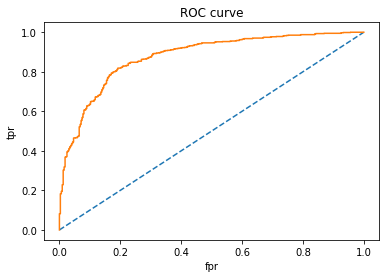

In [1140]:
train_fpr_lor, train_tpr_lor, train_thresholds_lor = roc_curve(y_train, probs_lor)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr_lor, train_tpr_lor);\
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

##### Test dataset LOR

In [1141]:
y_test_predict_lor = best_model_lor.predict(X_test)

In [1142]:
confusion_matrix(y_test, y_test_predict_lor)

array([[ 94,  45],
       [ 24, 295]], dtype=int64)

In [1143]:
df_LOR_test = pd.DataFrame(classification_report(y_test, y_test_predict_lor, output_dict=True)).T;
df_LOR_test

,precision,recall,f1-score,support
0,0.796610,0.676259,0.731518,139.000000
1,0.867647,0.924765,0.895296,319.000000
accuracy,0.849345,0.849345,0.849345,0.849345
macro avg,0.832129,0.800512,0.813407,458.000000
weighted avg,0.846088,0.849345,0.845590,458.000000


In [1144]:
probs_lor_test = best_model_lor.predict_proba(X_test)
probs_lor_test = probs_lor_test[:, 1]
AUC_LOR_test = roc_auc_score(y_test, probs_lor_test)
print('AUC_LOR_test: %.3f' % AUC_LOR_test)

AUC_LOR_test: 0.915


Text(0.5, 1.0, 'ROC curve')

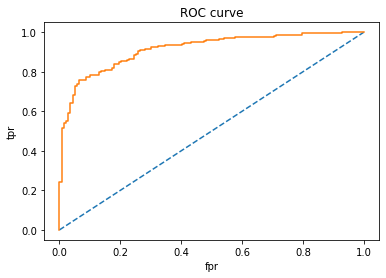

In [1145]:
test_fpr_lor, test_tpr_lor, test_thresholds_lor = roc_curve(y_test, probs_lor_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr_lor, test_tpr_lor);\
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

##### Train dataset LDA

In [1146]:
y_train_predict_lda = best_model_lda.predict(X_train)

In [1147]:
print(confusion_matrix(y_train, y_train_predict_lda))

[[218 105]
 [ 78 666]]


In [1148]:
df_LDA_train = pd.DataFrame(classification_report(y_train, y_train_predict_lda, output_dict=True)).T;
df_LDA_train

,precision,recall,f1-score,support
0,0.736486,0.674923,0.704362,323.000000
1,0.863813,0.895161,0.879208,744.000000
accuracy,0.828491,0.828491,0.828491,0.828491
macro avg,0.800150,0.785042,0.791785,1067.000000
weighted avg,0.825269,0.828491,0.826279,1067.000000


In [1149]:
probs_lda_train = best_model_lda.predict_proba(X_train)
probs_lda_train = probs_lda_train[:, 1]
AUC_LDA_train = roc_auc_score(y_train, probs_lda_train)
print('AUC_LDA_train: %.3f' % AUC_LDA_train)

AUC_LDA_train: 0.877


Text(0.5, 1.0, 'ROC curve')

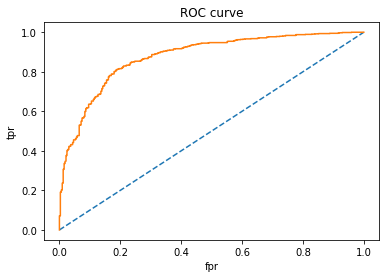

In [1150]:
train_fpr_lda, train_tpr_lda, train_thresholds_lda = roc_curve(y_train, probs_lda_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr_lda, train_tpr_lda);\
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

##### Test dataset LDA

In [1151]:
y_test_predict_lda = best_model_lda.predict(X_test)

In [1152]:
confusion_matrix(y_test, y_test_predict_lda)

array([[100,  39],
       [ 29, 290]], dtype=int64)

In [1153]:
df_LDA_test = pd.DataFrame(classification_report(y_test, y_test_predict_lda, output_dict=True)).T
df_LDA_test

,precision,recall,f1-score,support
0,0.775194,0.719424,0.746269,139.000000
1,0.881459,0.909091,0.895062,319.000000
accuracy,0.851528,0.851528,0.851528,0.851528
macro avg,0.828326,0.814258,0.820665,458.000000
weighted avg,0.849208,0.851528,0.849904,458.000000


In [1154]:
probs_lda_test = best_model_lda.predict_proba(X_test)
probs_lda_test = probs_lda_test[:, 1]
AUC_LDA_test = roc_auc_score(y_test, probs_lda_test)
print('AUC_LDA_test: %.3f' % AUC_LDA_test)

AUC_LDA_test: 0.915


Text(0.5, 1.0, 'ROC curve')

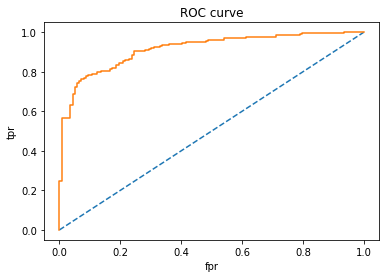

In [1155]:
test_fpr_lda, test_tpr_lda, test_thresholds_lda = roc_curve(y_test, probs_lda_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr_lda, test_tpr_lda);\
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

#### Naive bayes train dataset

In [1156]:
y_train_predict_nb = best_model_nb.predict(X_train)

In [1157]:
print(confusion_matrix(y_train, y_train_predict_nb))

[[220 103]
 [ 88 656]]


In [1158]:
df_NB_train = pd.DataFrame(classification_report(y_train, y_train_predict_nb, output_dict=True)).T
df_NB_train

,precision,recall,f1-score,support
0,0.714286,0.681115,0.697306,323.000000
1,0.864295,0.881720,0.872921,744.000000
accuracy,0.820993,0.820993,0.820993,0.820993
macro avg,0.789290,0.781417,0.785113,1067.000000
weighted avg,0.818885,0.820993,0.819759,1067.000000


In [1159]:
probs_nb_train = best_model_nb.predict_proba(X_train)
probs_nb_train = probs_nb_train[:, 1]
AUC_NB_train = roc_auc_score(y_train, probs_nb_train)
print('AUC_NB_train: %.3f' % AUC_NB_train)

AUC_NB_train: 0.874


Text(0.5, 1.0, 'ROC curve')

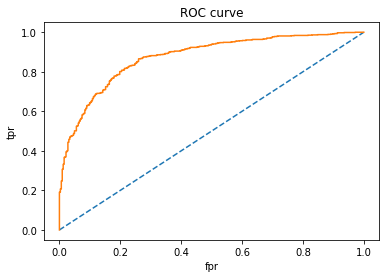

In [1160]:
train_fpr_nb, train_tpr_nb, train_thresholds_nb = roc_curve(y_train, probs_nb_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr_nb, train_tpr_nb);\
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

#### Naive bayes test dataset

In [1161]:
y_test_predict_nb = best_model_nb.predict(X_test)

In [1162]:
print(confusion_matrix(y_test, y_test_predict_nb))

[[101  38]
 [ 30 289]]


In [1163]:
df_NB_test= pd.DataFrame(classification_report(y_test, y_test_predict_nb,output_dict=True)).T
df_NB_test

,precision,recall,f1-score,support
0,0.770992,0.726619,0.748148,139.000000
1,0.883792,0.905956,0.894737,319.000000
accuracy,0.851528,0.851528,0.851528,0.851528
macro avg,0.827392,0.816287,0.821442,458.000000
weighted avg,0.849558,0.851528,0.850248,458.000000


In [1164]:
probs_nb_test = best_model_nb.predict_proba(X_test)
probs_nb_test = probs_nb_test[:, 1]
AUC_NB_test = roc_auc_score(y_test, probs_nb_test)
print('AUC_NB_test: %.3f' % AUC_NB_test)

AUC_NB_test: 0.910


Text(0.5, 1.0, 'ROC curve')

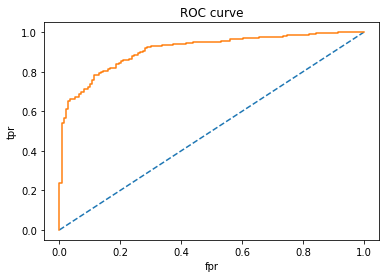

In [1165]:
test_fpr_nb, test_tpr_nb, test_thresholds_nb = roc_curve(y_test, probs_nb_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr_nb, test_tpr_nb);\
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

#### KNN train dataset

In [1166]:
y_train_predict_knn = best_model_knn.predict(X_train_s)

In [1167]:
print(confusion_matrix(y_train, y_train_predict_knn))

[[228  95]
 [ 74 670]]


In [1168]:
df_KNN_train=pd.DataFrame(classification_report(y_train, y_train_predict_knn, output_dict=True)).T;
df_KNN_train

,precision,recall,f1-score,support
0,0.754967,0.705882,0.729600,323.000000
1,0.875817,0.900538,0.888005,744.000000
accuracy,0.841612,0.841612,0.841612,0.841612
macro avg,0.815392,0.803210,0.808803,1067.000000
weighted avg,0.839234,0.841612,0.840053,1067.000000


In [1169]:
probs_knn_train = best_model_knn.predict_proba(X_train_s)
probs_knn_train = probs_knn_train[:, 1]
AUC_KNN_train = roc_auc_score(y_train, probs_knn_train)
print('AUC_KNN_train: %.3f' % AUC_KNN_train)

AUC_KNN_train: 0.907


Text(0.5, 1.0, 'ROC curve')

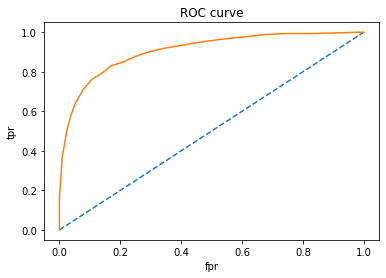

In [1170]:
train_fpr_knn, train_tpr_knn, train_thresholds_knn = roc_curve(y_train, probs_knn_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr_knn, train_tpr_knn);\
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

#### KNN test dataset

In [1171]:
y_test_predict_knn = best_model_knn.predict(X_test_s)

In [1172]:
print(confusion_matrix(y_test, y_test_predict_knn))

[[101  38]
 [ 30 289]]


In [1173]:
df_KNN_test=pd.DataFrame(classification_report(y_test, y_test_predict_knn, output_dict=True)).T
df_KNN_test

,precision,recall,f1-score,support
0,0.770992,0.726619,0.748148,139.000000
1,0.883792,0.905956,0.894737,319.000000
accuracy,0.851528,0.851528,0.851528,0.851528
macro avg,0.827392,0.816287,0.821442,458.000000
weighted avg,0.849558,0.851528,0.850248,458.000000


In [1174]:
probs_knn_test = best_model_knn.predict_proba(X_test_s)
probs_knn_test = probs_knn_test[:, 1]
AUC_KNN_test = roc_auc_score(y_test, probs_knn_test)
print('AUC_KNN_test: %.3f' % AUC_KNN_test)

AUC_KNN_test: 0.902


Text(0.5, 1.0, 'ROC curve')

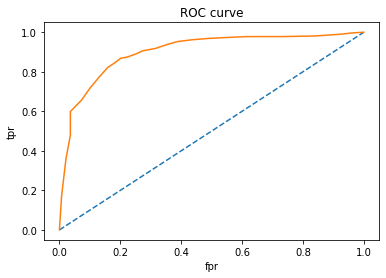

In [1175]:
test_fpr_knn, test_tpr_knn, test_thresholds_knn = roc_curve(y_test, probs_knn_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr_knn, test_tpr_knn);\
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

#### Bagging train dataset

In [1176]:
y_train_predict_bag = best_model_bag.predict(X_train)

In [1177]:
print(confusion_matrix(y_train, y_train_predict_bag))

[[224  99]
 [ 39 705]]


In [1178]:
df_Bag_train=pd.DataFrame(classification_report(y_train, y_train_predict_bag, output_dict=True)).T;
df_Bag_train

,precision,recall,f1-score,support
0,0.851711,0.693498,0.764505,323.000000
1,0.876866,0.947581,0.910853,744.000000
accuracy,0.870665,0.870665,0.870665,0.870665
macro avg,0.864288,0.820540,0.837679,1067.000000
weighted avg,0.869251,0.870665,0.866551,1067.000000


In [1179]:
probs_bag_train = best_model_bag.predict_proba(X_train)
probs_bag_train = probs_bag_train[:, 1]
AUC_Bag_train = roc_auc_score(y_train, probs_bag_train)
print('AUC_Bag_train: %.3f' % AUC_Bag_train)

AUC_Bag_train: 0.945


Text(0.5, 1.0, 'ROC curve')

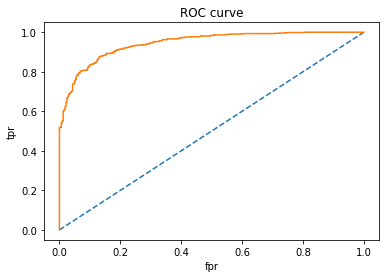

In [1180]:
train_fpr_bag, train_tpr_bag, train_thresholds_bag = roc_curve(y_train, probs_bag_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr_bag, train_tpr_bag);\
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

#### Bagging test dataset

In [1181]:
y_test_predict_bag = best_model_bag.predict(X_test)

In [1182]:
print(confusion_matrix(y_test, y_test_predict_bag))

[[ 92  47]
 [ 22 297]]


In [1183]:
df_Bag_test=pd.DataFrame(classification_report(y_test, y_test_predict_bag, output_dict=True)).T
df_Bag_test

,precision,recall,f1-score,support
0,0.807018,0.661871,0.727273,139.000000
1,0.863372,0.931034,0.895928,319.000000
accuracy,0.849345,0.849345,0.849345,0.849345
macro avg,0.835195,0.796452,0.811600,458.000000
weighted avg,0.846269,0.849345,0.844742,458.000000


In [1184]:
probs_bag_test = best_model_bag.predict_proba(X_test)
probs_bag_test = probs_bag_test[:, 1]
AUC_Bag_test = roc_auc_score(y_test, probs_bag_test)
print('AUC_Bag_test: %.3f' % AUC_Bag_test)

AUC_Bag_test: 0.920


Text(0.5, 1.0, 'ROC curve')

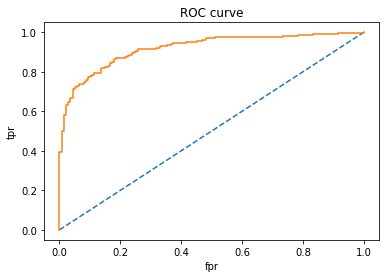

In [1185]:
test_fpr_bag, test_tpr_bag, test_thresholds_bag = roc_curve(y_test, probs_bag_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr_bag, test_tpr_bag);\
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

#### Boosting train dataset

In [1186]:
y_train_predict_boost = best_model_boost.predict(X_train)

In [1187]:
print(confusion_matrix(y_train, y_train_predict_boost))

[[232  91]
 [ 48 696]]


In [1188]:
df_Boost_train=pd.DataFrame(classification_report(y_train, y_train_predict_boost, output_dict=True)).T;
df_Boost_train

,precision,recall,f1-score,support
0,0.828571,0.718266,0.769486,323.000000
1,0.884371,0.935484,0.909210,744.000000
accuracy,0.869728,0.869728,0.869728,0.869728
macro avg,0.856471,0.826875,0.839348,1067.000000
weighted avg,0.867479,0.869728,0.866913,1067.000000


In [1189]:
probs_boost_train = best_model_boost.predict_proba(X_train)
probs_boost_train = probs_boost_train[:, 1]
AUC_Boost_train = roc_auc_score(y_train, probs_boost_train)
print('AUC_Boost_train: %.3f' % AUC_Boost_train)

AUC_Boost_train: 0.930


Text(0.5, 1.0, 'ROC curve')

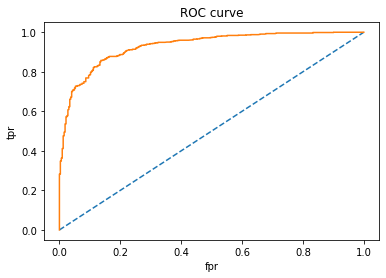

In [1190]:
train_fpr_boost, train_tpr_boost, train_thresholds_boost = roc_curve(y_train, probs_boost_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr_boost, train_tpr_boost);\
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

#### Boosting test dataset

In [1191]:
y_test_predict_boost = best_model_boost.predict(X_test)

In [1192]:
print(confusion_matrix(y_test, y_test_predict_boost))

[[ 96  43]
 [ 22 297]]


In [1193]:
df_Boost_test=pd.DataFrame(classification_report(y_test, y_test_predict_boost, output_dict=True)).T
df_Boost_test

,precision,recall,f1-score,support
0,0.813559,0.690647,0.747082,139.000000
1,0.873529,0.931034,0.901366,319.000000
accuracy,0.858079,0.858079,0.858079,0.858079
macro avg,0.843544,0.810841,0.824224,458.000000
weighted avg,0.855329,0.858079,0.854542,458.000000


In [1194]:
probs_boost_test = best_model_boost.predict_proba(X_test)
probs_boost_test = probs_boost_test[:, 1]
AUC_Boost_test = roc_auc_score(y_test, probs_bag_test)
print('AUC_Boost_test: %.3f' % AUC_Boost_test)

AUC_Boost_test: 0.920


Text(0.5, 1.0, 'ROC curve')

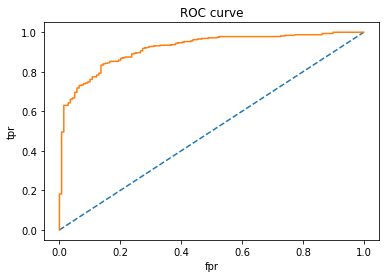

In [1195]:
test_fpr_boost, test_tpr_boost, test_thresholds_boost = roc_curve(y_test, probs_boost_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr_boost, test_tpr_boost);\
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

In [468]:
### for Labour party

In [1196]:
index=['Accuracy', 'AUC', 'Precision','Recall','F1 Score']
data = pd.DataFrame(
{'Logistic_Train':[LOR_g_train_score, AUC_LOR_train, df_LOR_train.iloc[1,0], df_LOR_train.iloc[1,1], df_LOR_train.iloc[1,2]],
'Logistic_Test':[LOR_g_test_score, AUC_LOR_test, df_LOR_test.iloc[1,0], df_LOR_test.iloc[1,1], df_LOR_test.iloc[1,2]],
 'LDA_Train':[LDA_g_train_score, AUC_LDA_train, df_LDA_train.iloc[1,0], df_LDA_train.iloc[1,1], df_LDA_train.iloc[1,2]],
'LDA_Test':[LDA_g_test_score, AUC_LDA_test, df_LDA_test.iloc[1,0], df_LDA_test.iloc[1,1], df_LDA_test.iloc[1,2]],
 'NB_Train':[NB_g_train_score, AUC_NB_train, df_NB_train.iloc[1,0], df_NB_train.iloc[1,1], df_NB_train.iloc[1,2]],
'NB_Test':[NB_g_test_score, AUC_NB_test, df_NB_test.iloc[1,0], df_NB_test.iloc[1,1], df_NB_test.iloc[1,2]],
 'KNN_Train':[KNN_g_train_score, AUC_KNN_train, df_KNN_train.iloc[1,0], df_KNN_train.iloc[1,1], df_KNN_train.iloc[1,2]],
'KNN_Test':[KNN_g_test_score, AUC_KNN_test, df_KNN_test.iloc[1,0], df_KNN_test.iloc[1,1], df_KNN_test.iloc[1,2]],
'Bagging_Train':[Bag_g_train_score, AUC_Bag_train, df_Bag_train.iloc[1,0], df_Bag_train.iloc[1,1], df_Bag_train.iloc[1,2]],
'Bagging_Test':[Bag_g_test_score, AUC_Bag_test, df_Bag_test.iloc[1,0], df_Bag_test.iloc[1,1], df_Bag_test.iloc[1,2]],
'Boosting_Train':[Boost_g_train_score, AUC_Boost_train, df_Boost_train.iloc[1,0], df_Boost_train.iloc[1,1], df_Boost_train.iloc[1,2]],
'Boosting_Test':[Boost_g_test_score, AUC_Boost_test, df_Boost_test.iloc[1,0], df_Boost_test.iloc[1,1], df_Boost_test.iloc[1,2]]
},
index=index).T
round(data,2)

,Accuracy,AUC,Precision,Recall,F1 Score
Logistic_Train,0.83,0.88,0.86,0.91,0.88
Logistic_Test,0.85,0.91,0.87,0.92,0.90
LDA_Train,0.83,0.88,0.86,0.90,0.88
LDA_Test,0.85,0.92,0.88,0.91,0.90
NB_Train,0.82,0.87,0.86,0.88,0.87
NB_Test,0.85,0.91,0.88,0.91,0.89
KNN_Train,0.84,0.91,0.88,0.90,0.89
KNN_Test,0.85,0.90,0.88,0.91,0.89
Bagging_Train,0.87,0.94,0.88,0.95,0.91
Bagging_Test,0.85,0.92,0.86,0.93,0.90


In [1197]:
### for Conservative party

In [1198]:
index=['Accuracy', 'AUC', 'Precision','Recall','F1 Score']
data = pd.DataFrame(
{'Logistic_Train':[LOR_g_train_score, AUC_LOR_train, df_LOR_train.iloc[0,0], df_LOR_train.iloc[0,1], df_LOR_train.iloc[0,2]],
'Logistic_Test':[LOR_g_test_score, AUC_LOR_test, df_LOR_test.iloc[0,0], df_LOR_test.iloc[0,1], df_LOR_test.iloc[0,2]],
 'LDA_Train':[LDA_g_train_score, AUC_LDA_train, df_LDA_train.iloc[0,0], df_LDA_train.iloc[0,1], df_LDA_train.iloc[0,2]],
'LDA_Test':[LDA_g_test_score, AUC_LDA_test, df_LDA_test.iloc[0,0], df_LDA_test.iloc[0,1], df_LDA_test.iloc[0,2]],
 'NB_Train':[NB_g_train_score, AUC_NB_train, df_NB_train.iloc[0,0], df_NB_train.iloc[0,1], df_NB_train.iloc[0,2]],
'NB_Test':[NB_g_test_score, AUC_NB_test, df_NB_test.iloc[0,0], df_NB_test.iloc[0,1], df_NB_test.iloc[0,2]],
 'KNN_Train':[KNN_g_train_score, AUC_KNN_train, df_KNN_train.iloc[0,0], df_KNN_train.iloc[0,1], df_KNN_train.iloc[0,2]],
'KNN_Test':[KNN_g_test_score, AUC_KNN_test, df_KNN_test.iloc[0,0], df_KNN_test.iloc[0,1], df_KNN_test.iloc[0,2]],
'Bagging_Train':[Bag_g_train_score, AUC_Bag_train, df_Bag_train.iloc[0,0], df_Bag_train.iloc[0,1], df_Bag_train.iloc[0,2]],
'Bagging_Test':[Bag_g_test_score, AUC_Bag_test, df_Bag_test.iloc[0,0], df_Bag_test.iloc[0,1], df_Bag_test.iloc[0,2]],
'Boosting_Train':[Boost_g_train_score, AUC_Boost_train, df_Boost_train.iloc[0,0], df_Boost_train.iloc[0,1], df_Boost_train.iloc[0,2]],
'Boosting_Test':[Boost_g_test_score, AUC_Boost_test, df_Boost_test.iloc[0,0], df_Boost_test.iloc[0,1], df_Boost_test.iloc[0,2]]
},
index=index).T
round(data,2)

,Accuracy,AUC,Precision,Recall,F1 Score
Logistic_Train,0.83,0.88,0.75,0.65,0.70
Logistic_Test,0.85,0.91,0.80,0.68,0.73
LDA_Train,0.83,0.88,0.74,0.67,0.70
LDA_Test,0.85,0.92,0.78,0.72,0.75
NB_Train,0.82,0.87,0.71,0.68,0.70
NB_Test,0.85,0.91,0.77,0.73,0.75
KNN_Train,0.84,0.91,0.75,0.71,0.73
KNN_Test,0.85,0.90,0.77,0.73,0.75
Bagging_Train,0.87,0.94,0.85,0.69,0.76
Bagging_Test,0.85,0.92,0.81,0.66,0.73


## 1.8) Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific

5

Business insights:
Based on the EDA analysis,
* Economic conditions are playing very key role in the elections.
* People are aware of the both parties stand on economy of the both country and every household.
* Labour party is having better knowledge towards this economy aspect than other party which is why CNBE survey is giving Labour party and its’ leader as a clear winner.
* Along with economy, European integration and Eurosceptic sentiments are also key aspects in deciding the winner.
* Even though both the parties have good knowledge about European integration, Labour party is more favoured towards the European integration.
* People are wanting unity among European nations, the same which Labour party also supporting.

Recommendations:
* Survey has included ~1500 of the people, it should be more to get clear results, at least in 10000-20000 range is ideal.
* Survey has been done two main aspects here, Economy and European integration. It should have included some more aspects such as Agricultural, Industrial policies. Separate schemes for poor people and their opinion on them. Different policies parties going to offer for entrepreneurs etc.
* Labour party should continue their economy policies and stand on European integration. This will help them to cash more voting percentage.
* Conservative party should concentration on their Economy policies. Their leader rating also should be improved or else party should change the proposed leaders.